<h2><center> Welcome to the UmojaHack Africa 2023 Cryptojacking Detection Challenge Starter Notebook</h2></center>
<figure>
<center><img src ="https://drive.google.com/uc?export=view&id=1afxycLZz1AovI0MjqEIiXyziEVWnUkNG" width = "750" height = '500' alt="Cryptojacking Detection Challenge"/>

*About the problem*
> Cryptojacking is a cyber-attack utilizing malicious scripts similar to those from large cryptocurrency houses to illegally mine data without users being aware. These attacks are stealthy and difficult to detect or analyze, often leading to decreased computing speeds for users as well as crashes due to straining of computational resources.


*The objective of this challenge is*:
> classify network activity from various websites as either cryptojacking or not based on features related to both network-based and host-based data.



## Table of contents:

1. [Importing Libraries](#Libraries)
2. [Loading Data](#Data)
3. [Statistical Summaries](#Statistics)
4. [Missing Values and Duplicates](#Missing)
5. [Target Distribution](#Engineering)
6. [Modelling](#Modelling)

<a name="Libraries"></a>
## 1. Importing Libraries


In [1]:
SEED = 1221
# Import libraries
import pandas as pd
import numpy as np

<a name="Data"></a>
## 2. Loading Data

In [2]:
# Load files
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
samplesubmission = pd.read_csv('SampleSubmission.csv')

# Preview train dataset
train.tail(17)

,ID,I/O Data Operations,I/O Data Bytes,Number of subprocesses,Time on processor,Disk Reading/sec,Disc Writing/sec,Bytes Sent/sent,Received Bytes (HTTP),Network packets sent,Network packets received,Pages Read/sec,Pages Input/sec,Page Errors/sec,Confirmed byte radius,Label
8891,ID_2ESSO0L11N,31.369916,1.272283e+05,47.0,0.523750,13.042666,0.355507,552.058061,15501.486390,3.843920,11.953926,0.777672,0.0,11813.766980,29.046441,0
8892,ID_AKGXY41K1H,47.827710,7.371311e+04,33.0,0.417567,31.901310,3.176802,2366.917285,48359.121000,17.727887,35.766790,0.977477,0.0,14595.093910,25.390180,1
8893,ID_LZ48KY7J5D,288.515048,3.235146e+06,34.0,12.147807,15.459373,3.348033,2436.806183,48967.205330,15.841364,38.154093,1.909952,0.0,12387.789050,23.551037,0
8894,ID_8ABPXYH94Q,5.206184,1.206473e+03,25.0,0.000000,1.201427,0.000000,232.616322,5503.457480,2.803330,4.004757,0.000000,0.0,354.741392,31.260762,1
8895,ID_3X7WT3VBKL,19.030549,1.989524e+04,32.0,0.156090,5.694180,0.024974,1982.973263,951.902089,2.747192,2.347601,0.124872,0.0,2000.105752,30.391505,1
8896,ID_P27V9U45HS,1.333634,2.518790e+02,27.0,0.000000,1.022453,0.000000,130.007074,185.819651,1.133589,0.955771,0.022227,0.0,334.141964,30.607160,0
8897,ID_9O3VPYAFMZ,4.998256,1.087620e+03,27.0,0.034710,0.444289,0.000000,8.241568,19.304374,0.155501,0.155501,0.000000,0.0,363.251010,22.952369,1
8898,ID_B8M5GWEOGM,32.709430,1.211241e+05,31.0,0.496719,18.153456,2.044208,1565.218977,26274.116870,9.287815,22.419629,0.933225,0.0,14986.555640,28.765213,0
8899,ID_TC2L1VMUKD,41.519606,4.015042e+04,28.0,0.138917,4.734302,0.000000,304.440068,504.814399,2.000409,2.044863,0.044454,0.0,1356.566451,30.425613,0
8900,ID_US51XRAHBH,32.709430,1.211241e+05,40.0,0.496719,12.886189,1.177531,1266.134736,22052.757580,10.842173,21.662128,0.910920,0.0,11745.183750,35.083682,0


In [5]:
train["Pages Input/sec"].unique()

array([0.00000000e+00, 6.44579400e-03, 9.11328975e-01, 6.29793000e-04,
       9.33335364e-01, 4.66795660e-01, 1.66650125e+00, 5.30226400e-03,
       1.66765837e+00, 6.22156829e-01, 1.42223884e+00, 2.95562176e+00,
       1.57796855e+00, 8.44334790e-01, 1.04440982e+00, 5.55586470e-01,
       6.22123097e-01, 5.99948011e-01, 2.20002728e+00, 2.44378105e-01,
       1.99932261e+00, 2.44373738e-01, 4.88981193e-01, 1.73332686e+00,
       4.22336076e-01, 2.66704608e+00])

In [3]:
# Preview test dataset
test.head()

,ID,I/O Data Operations,I/O Data Bytes,Number of subprocesses,Time on processor,Disk Reading/sec,Disc Writing/sec,Bytes Sent/sent,Received Bytes (HTTP),Network packets sent,Network packets received,Pages Read/sec,Pages Input/sec,Page Errors/sec,Confirmed byte radius
0,ID_L7RNFK5JC9,32.709430,121124.141400,30.407359,0.496719,3.999064,0.000000,335.565884,737.338490,1.844013,1.910664,0.311038,0.0,726.318848,20.008686
1,ID_KUTY5K1G5F,2.065990,2029.713475,29.000000,0.000000,3.665467,0.000000,63.845771,41.119875,0.733093,0.577589,0.044430,0.0,385.473839,33.015399
2,ID_H6PJWKU831,114.524684,3888.550764,28.000000,0.486075,0.777719,0.199985,11.354698,11.332477,0.177764,0.133323,0.000000,0.0,504.828540,30.091141
3,ID_DNQXNVTXHE,27.036810,5581.324782,25.000000,0.314968,1.789015,0.000000,44.297028,13.430214,0.302369,0.125987,0.000000,0.0,465.950312,22.211252
4,ID_8CRTF1BJOD,1.177267,176.634467,28.000000,0.000000,1.710369,0.000000,88.161746,57.508380,0.888503,0.777440,0.000000,0.0,771.665166,31.032570


In [4]:
# Preview sample submission file
samplesubmission.head()

,ID,Target
0,ID_VT5SH34X8O,0
1,ID_4RQRV7XN3E,0
2,ID_1XCH999D2E,0
3,ID_J2ZBZIO0RW,0
4,ID_KG3PE5VXCN,0


In [5]:
# Check size and shape of datasets
train.shape, test.shape, samplesubmission.shape

((8908, 16), (3818, 15), (3818, 2))

<a name="Statistics"></a>
## 3. Statistical Summaries

In [6]:
# Train statistical summary
train.describe(include = 'all')

,ID,I/O Data Operations,I/O Data Bytes,Number of subprocesses,Time on processor,Disk Reading/sec,Disc Writing/sec,Bytes Sent/sent,Received Bytes (HTTP),Network packets sent,Network packets received,Pages Read/sec,Pages Input/sec,Page Errors/sec,Confirmed byte radius,Label
count,8908,8908.000000,8.908000e+03,8908.000000,8908.000000,8908.000000,8908.000000,8908.000000,8.908000e+03,8908.000000,8908.000000,8908.000000,8908.000000,8908.000000,8908.000000,8908.000000
unique,8908,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,ID_4W8AP96UO6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,36.429205,1.135564e+05,29.811900,0.496405,5.353260,1.046153,559.546628,1.655804e+04,4.795485,12.625792,0.988036,0.004177,2779.178084,28.436192,0.269870
std,NaN,75.884647,4.896846e+05,5.691411,1.593626,19.286690,15.667814,1939.745234,9.042803e+04,20.797585,61.246541,12.495768,0.082923,4996.003166,3.970140,0.443917
min,NaN,0.000000,0.000000e+00,1.000000,0.000000,0.044459,0.000000,1.197890,1.554938e+00,0.022183,0.022183,0.000000,0.000000,16.143987,18.057942,0.000000
25%,NaN,1.394404,8.136318e+02,27.000000,0.000000,0.755629,0.000000,33.843800,2.737770e+01,0.399999,0.333225,0.000000,0.000000,351.620535,25.266134,0.000000
50%,NaN,11.613803,4.930482e+03,28.000000,0.034734,1.711077,0.000000,67.366295,8.905770e+01,0.710898,0.635705,0.022222,0.000000,682.943866,28.543826,0.000000
75%,NaN,34.494953,3.940357e+04,30.000000,0.451350,5.845619,0.022229,221.314810,5.613814e+02,1.555063,1.711155,0.088887,0.000000,1356.673217,30.969542,1.000000


<a name="Missing"></a>
## 4. Missing Values and Duplicates

In [7]:
# Check for missing values
train.isnull().sum().any(), test.isnull().sum().any()

(False, False)

In [8]:
# Check for duplicates
train.duplicated().any(), test.duplicated().any()

(False, False)

There are no missing values or duplicates

<a name="Class Distribution"></a>
## 5. Target Distribution

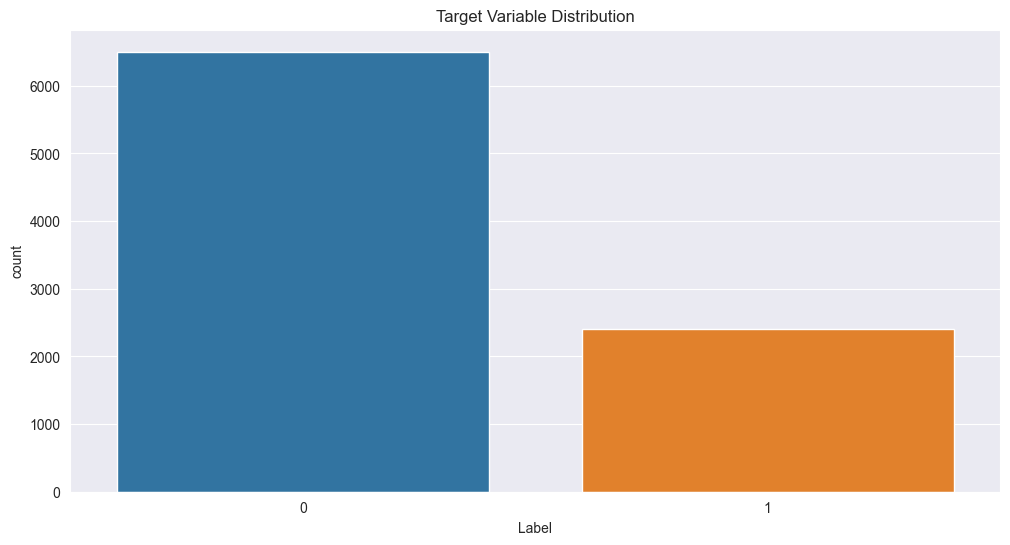

In [9]:
# A box plot showing outliers
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
plt.figure(figsize=(12, 6))
sns.countplot(x = 'Label', data = train)
plt.title('Target Variable Distribution')
plt.show()

There is a class imbalance in our dataset

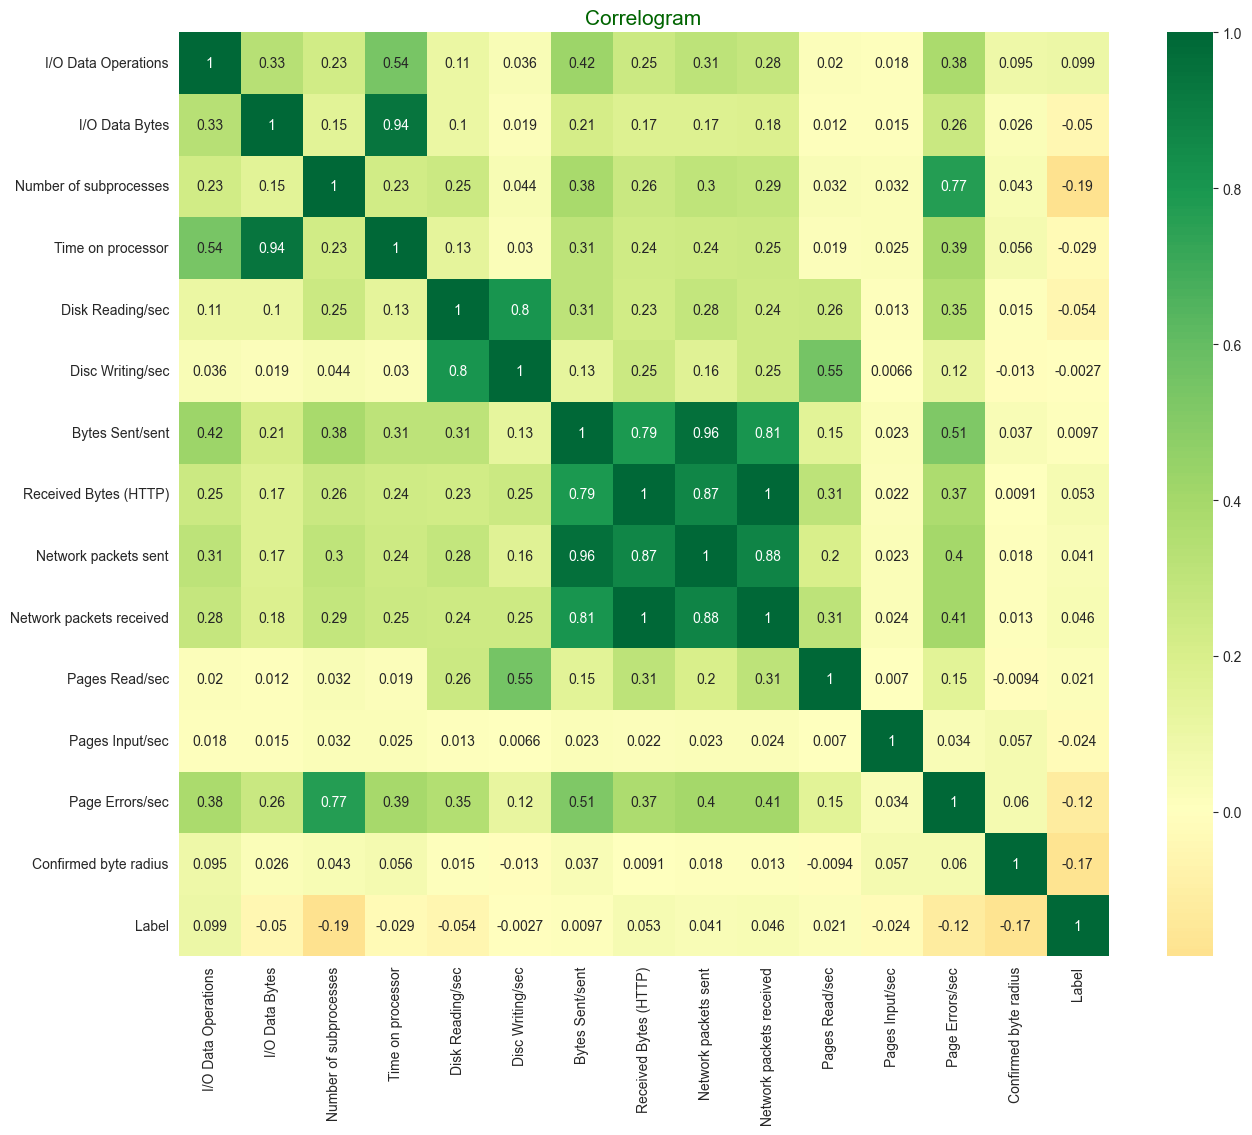

In [10]:
# Plotting a heatmap to show correlations between variables
corr = train.corr()
plt.figure(figsize = (15, 12))
sns.heatmap(corr, cmap='RdYlGn', annot = True, center = 0)
plt.title('Correlogram', fontsize = 15, color = 'darkgreen')
plt.show()

Most features are not strongly correlated with the target

<a name="Preprocess"></a>
## 6. Modeling

In [11]:
#scale numerical features for logistic model
from sklearn.preprocessing import StandardScaler
features = train.drop(columns=['ID','Label', 'Pages Input/sec']).columns
target = 'Label'

# define standard scaler
scaler = StandardScaler()

# transform data
train[features] = scaler.fit_transform(train[features])
test[features] = scaler.transform(test[features])

In [12]:
#split train data into train and validation set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train[features], 
                                                    train[target].to_frame(),
                                                    stratify=train[target], #to account for class imbalance
                                                    test_size=0.25,
                                                    random_state=SEED)

In [13]:
import imblearn 
from imblearn.over_sampling import SMOTE 
smote = SMOTE(random_state=1) 
X_train, y_train = smote.fit_resample(X_train, y_train)

In [14]:
#fit logistic regression model on test data
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train['Label'])

#make predictions on validation set
log_preds = model.predict(X_test)
model.score(X_test, y_test)

0.6609788953749439

In [15]:
# lightgbm # Light gradient boosting model
import lightgbm as ltb
ltb_model = ltb.LGBMClassifier(random_state=10)
ltb_model.fit(X_train, y_train['Label'])
ltb_y_pred = ltb_model.predict(X_test)
print(ltb_y_pred)
ltb_model.score(X_test, y_test)

[0 1 0 ... 1 1 0]


0.9757521329142343

In [16]:
#check performance of the model
from sklearn.metrics import classification_report
print(classification_report(y_test, ltb_y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1626
           1       0.96      0.96      0.96       601

    accuracy                           0.98      2227
   macro avg       0.97      0.97      0.97      2227
weighted avg       0.98      0.98      0.98      2227



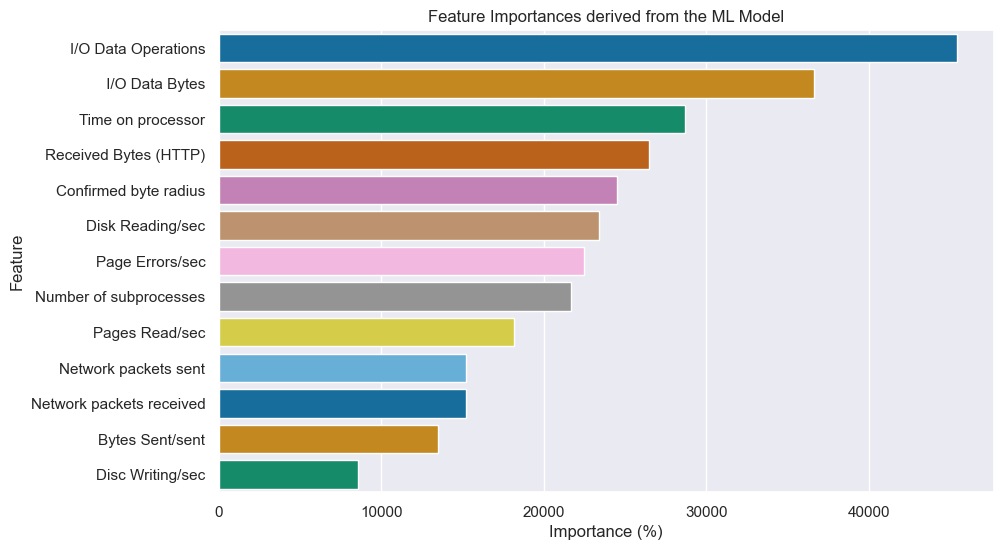

In [17]:
importances_df = pd.Series(ltb_model.feature_importances_ * 100, list(X_train.columns)).to_frame()

top_15_importances = importances_df.reset_index().rename(columns ={
                              'index': 'Feature',
                              0: 'Importance (%)'  
                            }).sort_values('Importance (%)', ascending=False).head(15)
sns.set(font_scale=1)
plt.figure(figsize=(10, 6))
sns.barplot(y='Feature', x="Importance (%)", data=top_15_importances, palette='colorblind')
plt.title('Feature Importances derived from the ML Model')
plt.show()

In [18]:
#Cross Validation
from sklearn.model_selection import cross_val_score 
scores = cross_val_score(ltb_model, X_train, y_train, cv=5, scoring='f1_macro')
scores 

C:\Users\hp\anaconda3\envs\streamlit_2\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda3\envs\streamlit_2\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda3\envs\streamlit_2\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda3\envs\streamlit_2\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 

array([0.9672073 , 0.97027034, 0.98513394, 0.98206001, 0.98564672])

In [19]:
#make predictions on test set
test['Target'] = ltb_model.predict(test[features])
test.head()

,ID,I/O Data Operations,I/O Data Bytes,Number of subprocesses,Time on processor,Disk Reading/sec,Disc Writing/sec,Bytes Sent/sent,Received Bytes (HTTP),Network packets sent,Network packets received,Pages Read/sec,Pages Input/sec,Page Errors/sec,Confirmed byte radius,Target
0,ID_L7RNFK5JC9,-0.049022,0.015455,0.104630,0.000197,-0.070218,-0.066775,-0.115476,-0.174963,-0.141922,-0.174961,-0.054181,0.0,-0.410923,-2.122842,0
1,ID_KUTY5K1G5F,-0.452860,-0.227765,-0.142662,-0.311511,-0.087516,-0.066775,-0.255564,-0.182663,-0.195341,-0.196728,-0.075518,0.0,-0.479151,1.153477,0
2,ID_H6PJWKU831,1.029192,-0.223969,-0.318375,-0.006482,-0.237252,-0.054010,-0.282626,-0.182992,-0.222044,-0.203982,-0.079074,0.0,-0.455259,0.416872,1
3,ID_DNQXNVTXHE,-0.123779,-0.220512,-0.845514,-0.113858,-0.184814,-0.066775,-0.265642,-0.182969,-0.216052,-0.204101,-0.079074,0.0,-0.463042,-1.568028,1
4,ID_8CRTF1BJOD,-0.464572,-0.231549,-0.318375,-0.311511,-0.188892,-0.066775,-0.243027,-0.182482,-0.187868,-0.193464,-0.079074,0.0,-0.401846,0.654013,0


In [20]:
#scale numerical features for logistic model
features = test.drop(columns=['ID','Target']).columns
target = 'Target'

# define standard scaler
scaler = StandardScaler()

# transform data
train[features] = scaler.fit_transform(train[features])
test[features] = scaler.transform(test[features])

In [21]:
#split train data into train and validation set
X_train, X_test, y_train, y_test = train_test_split(test[features], 
                                                    test[target].to_frame(),
                                                    stratify=test[target], #to account for class imbalance
                                                    test_size=0.2,
                                                    random_state=SEED)

In [22]:
#fit logistic regression model on test data
model = LogisticRegression()
model.fit(X_train, y_train['Target'])

#make predictions on validation set
log_preds = model.predict(X_test)
model.score(X_test, y_test)

0.7696335078534031

In [23]:
test_model = ltb.LGBMClassifier(random_state=10)
test_model.fit(X_train, y_train)
test_model_pred = test_model.predict(X_test)
print(test_model_pred)
test_model.score(X_test, y_test)

C:\Users\hp\anaconda3\envs\streamlit_2\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda3\envs\streamlit_2\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1
 1 0 0 1 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 1 0
 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0
 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0
 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0
 0 1 0 1 0 0 1 1 0 0 0 0 

0.9541884816753927

In [24]:
#check performance of the model
print(classification_report(y_test, test_model_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       559
           1       0.95      0.88      0.91       205

    accuracy                           0.95       764
   macro avg       0.95      0.93      0.94       764
weighted avg       0.95      0.95      0.95       764



In [25]:
sub = test[['ID', 'Target']]

In [26]:
sub.head()

,ID,Target
0,ID_L7RNFK5JC9,0
1,ID_KUTY5K1G5F,0
2,ID_H6PJWKU831,1
3,ID_DNQXNVTXHE,1
4,ID_8CRTF1BJOD,0


In [27]:
sub.to_csv('UHA_23_crypto.csv', index=False)